In [1]:
import numpy as np

In [2]:
hd984b = np.load('hd984b.npy',allow_pickle=True).item()

In [3]:
hd984b['wave']# / 'spec' / 'err']

array([2.85968447, 2.86036086, 2.86103725, ..., 5.27700758, 5.27767324,
       5.27833891])

In [4]:
import matplotlib.pyplot as plt

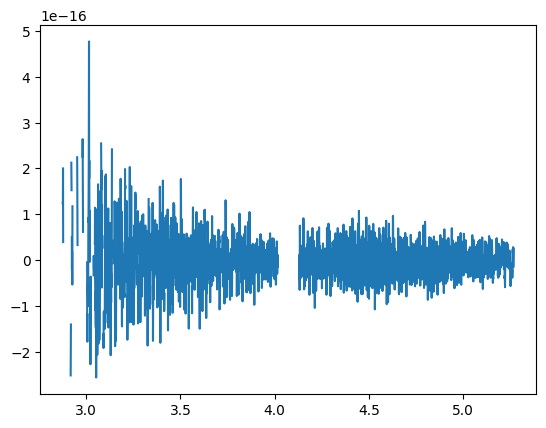

In [5]:
plt.plot(hd984b['wave'], hd984b['spec'])

In [6]:
spectrum = np.array([hd984b['wave'], hd984b['spec'], hd984b['err']]).T

In [7]:
cleaned_arr = spectrum[~np.isnan(spectrum).any(axis=1)]

In [8]:
cleaned_arr.shape

(3128, 3)

In [38]:
np.savetxt('hd984B_nirspec_nonans.txt', cleaned_arr, delimiter='\t')

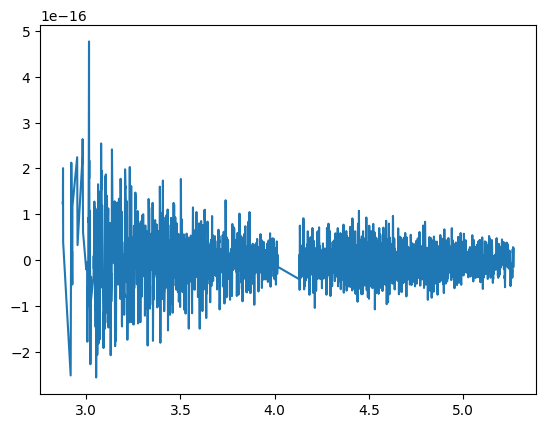

In [10]:
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])

(-2e-16, 2e-16)

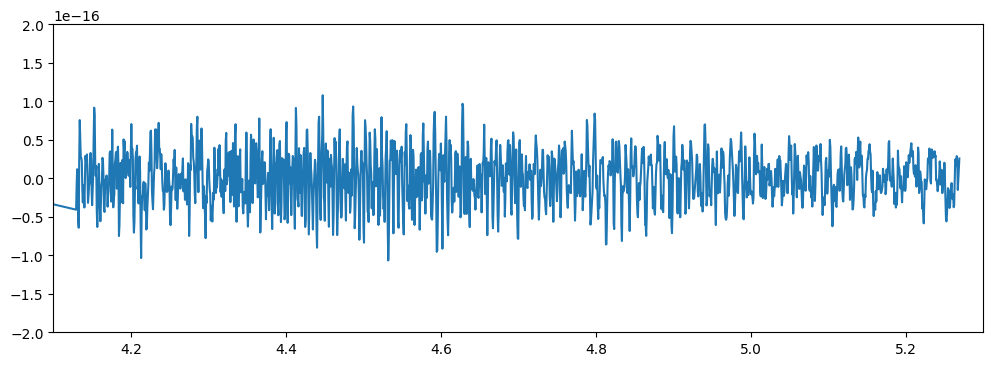

In [19]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.xlim(4.1,5.3)
plt.ylim(-2e-16,2e-16)

In [39]:
(3750-2500)/(5-3)

625.0

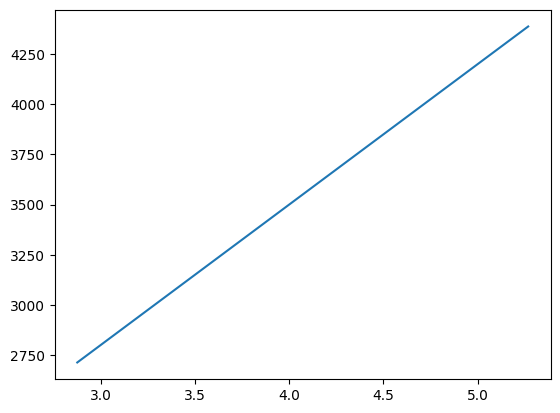

In [50]:
w = cleaned_arr[:,0]
rs = (w*700) + 700

plt.plot(w, rs)

In [14]:
model = './evaluate_HD984B_test/HD984B_test_bestfit_model_full.npy'

prt = np.load(model)

In [49]:
model = './evaluate_HD984B_test/model_spec_best_fit_NIRSPEC_G395H_HPF.dat'

prt = np.loadtxt(model)

In [16]:
from spectres import spectres
from breads.utils import filter_spec_with_spline

In [19]:
rebin_flux = spectres(cleaned_arr[:,0], prt[:,0], prt[:,1])

In [22]:
x_nodes = np.linspace(cleaned_arr[0,0], cleaned_arr[-1,0], 60)
hpf,_ = filter_spec_with_spline(cleaned_arr[:,0],rebin_flux,x_nodes=x_nodes)

(-2e-16, 2e-16)

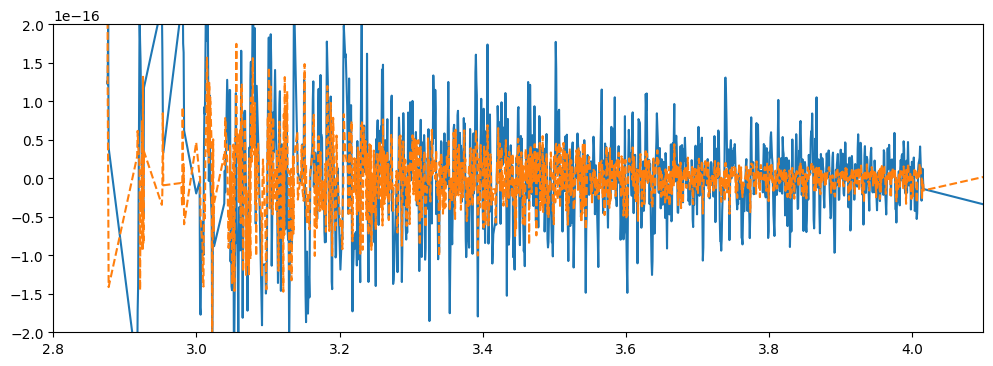

In [26]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(2.8,4.1)
plt.ylim(-2e-16,2e-16)

(-2e-16, 2e-16)

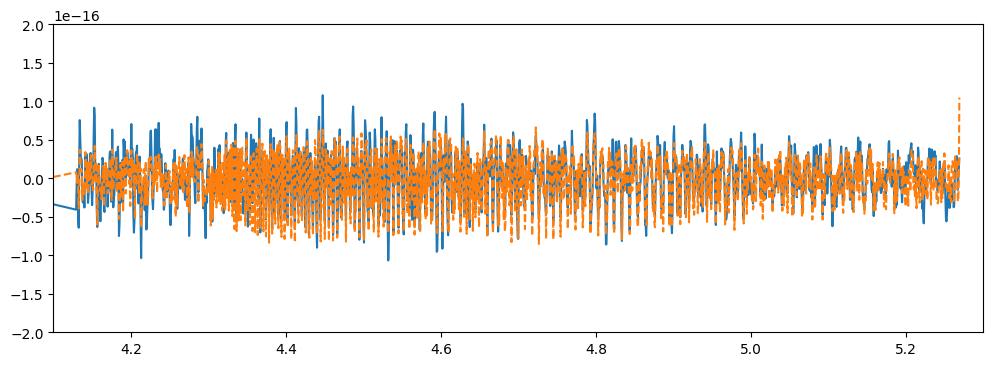

In [27]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(4.1,5.3)
plt.ylim(-2e-16,2e-16)

(-2e-16, 2e-16)

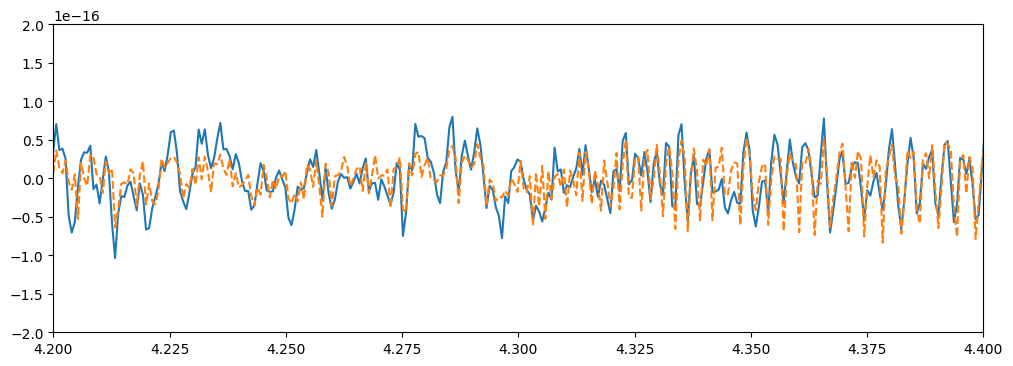

In [29]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(4.2,4.4)
plt.ylim(-2e-16,2e-16)

In [30]:
from scipy.signal import correlate

In [33]:
corr = correlate(cleaned_arr[:,1], hpf, mode='same')

In [ ]:
wavel_shift = self.best_fit_parameters[data.name + "_radvel"].value * 1e1 * self.best_fit_spectra[name][0] / cst.c # i think this is in cm



In [39]:
from astropy.constants import c
import astropy.units as u

(4.2, 4.25)

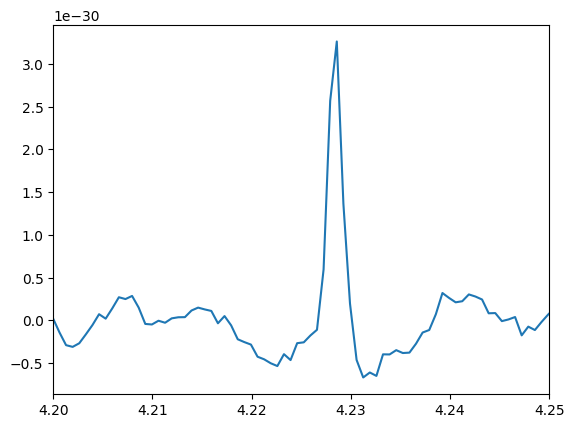

In [48]:
plt.plot(cleaned_arr[:,0], corr)
plt.xlim(4.2, 4.25)